In [1]:
#Importing libraries for dataframe creation and graph plotting

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import calendar 

In [2]:
#Importing Divvy trips 2019_Q1 Dataset

divvy_df = pd.read_csv("Divvy_Trips_2019_Q1.csv")

### Exploring the dataset  

In [3]:
# Exploring the dataset  

divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [4]:
#Exploring how many rows and columns in the dataset
divvy_df.shape

(365069, 12)

In [5]:
#Checking for duplicates 
divvy_df.duplicated().sum()

0

In [6]:
#Showing data columns names 
divvy_df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [7]:
divvy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [8]:
#Checking unique values in gender column
divvy_df["gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
#Checking unique values in usertype column
divvy_df["usertype"].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [10]:
#Checking null values in the dataset 
divvy_df.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

## Data Preparation

Converting start_time and end_time columns to date format and creating new column for start_hour and day_of_week


In [11]:
#Converting start_time and end_time columns to date format

divvy_df["start_time"] = pd.to_datetime(divvy_df["start_time"])
divvy_df["end_time"] = pd.to_datetime(divvy_df["end_time"])

In [12]:
#Creating new column for start hour

divvy_df["start_hour"] = divvy_df["start_time"].apply(
    lambda x : x.hour)

In [13]:
#Creating new column for start weekday

day_of_week = divvy_df["start_time"].apply(lambda x : x.dayofweek)
divvy_df["day_of_week"] = [calendar.day_name[x] for x in day_of_week]

# 

Exploring tripduration column and replacing extreme trips durations that are longer than 24 hours with the mean of trip with duration less than 24hrs.

In [14]:
#Checking Data type of tripduration column 
print(divvy_df["tripduration"].dtypes)

object


In [15]:
#Exploring values of tripduration that contain ","
divvy_df["tripduration"].unique()

array(['390.0', '441.0', '829.0', ..., '8,253.0', '3,892.0',
       '1,887,870.0'], dtype=object)

In [16]:
#Deleting "," from tripduration values so it can be converted to float
divvy_df["tripduration"] = divvy_df["tripduration"].apply(
    lambda x : x.replace("," , ""))

In [17]:
divvy_df["tripduration"]

0          390.0
1          441.0
2          829.0
3         1783.0
4          364.0
           ...  
365064     757.0
365065     332.0
365066     846.0
365067     178.0
365068     448.0
Name: tripduration, Length: 365069, dtype: object

In [18]:
#Changing tripduration data type to float then to Integer 

divvy_df["tripduration"] = divvy_df["tripduration"].astype(
    "float64").astype("Int64")

In [19]:
divvy_df["tripduration"]

0          390
1          441
2          829
3         1783
4          364
          ... 
365064     757
365065     332
365066     846
365067     178
365068     448
Name: tripduration, Length: 365069, dtype: Int64

In [20]:
#Rendering extremely long trips with duration more than 3 hours 

three_hours = 3 * 60 * 60
extreme_trips = divvy_df["tripduration"][
                    divvy_df["tripduration"] > three_hours ]
extreme_trips

100        112466
145         95430
311         85554
517         76350
520         66622
           ...   
362390      11113
363445      12219
363475      14100
364292      68699
364793    1887870
Name: tripduration, Length: 763, dtype: Int64

In [21]:
#Exploring how long are these extreme_trips in hours
one_hour_duration = 60 *60
(extreme_trips/ one_hour_duration ).sort_values(
    ascending = False)

148897    2952.333333
246297    1693.452778
88324     1568.383333
128296    1349.852778
132676    1090.791667
             ...     
218535       3.027222
163631       3.018333
348535       3.016944
23232        3.013889
46802        3.010278
Name: tripduration, Length: 763, dtype: Float64

In [22]:
#Calculating mean duration for trips with duration less than 3 hours 

tripduration_mean = round(divvy_df["tripduration"][
                    divvy_df["tripduration"] <= three_hours].mean())
tripduration_mean

723

In [23]:
#Number of trips that are more than 3 hours 

len(divvy_df[divvy_df["tripduration"] > three_hours])

763

In [24]:
#Replacing extreme trips duration with the mean of trips duration 

divvy_df["tripduration"][divvy_df["tripduration"] > 
                         three_hours] = [tripduration_mean] * 763

In [25]:
#Creating new colum for tripduration in minutes 

divvy_df["tripduration_min"]= (divvy_df["tripduration"]/60).apply(round)

# 

Fillling Null values in gender column with "Missing"

In [26]:
#Fillling Null values in gender column with "Missing"
divvy_df["gender"].fillna("Missing", inplace = True)

In [27]:
divvy_df["gender"].isnull().sum()

0

# 

Using birthyear column to get users ages and replacing extreme old ages that are above 80 years old with mean of users ages and replacing null values with age mean

In [28]:
#Adding new column for user age 
today = datetime.date.today()
current_year = today.year
divvy_df["user_age"] = divvy_df["birthyear"].apply(
                lambda x : current_year - x)

In [29]:
divvy_df["user_age"].describe()

count    347046.000000
mean         41.325703
std          11.245683
min          20.000000
25%          33.000000
50%          38.000000
75%          48.000000
max         123.000000
Name: user_age, dtype: float64

In [30]:
# exploring extreme user ages that above 80 years old
divvy_df["user_age"][divvy_df["user_age"] > 80]

492        83.0
2615       81.0
2943       81.0
2964       81.0
3182       83.0
          ...  
356532    105.0
362953     83.0
363825    123.0
364890    123.0
364902    123.0
Name: user_age, Length: 280, dtype: float64

In [31]:
len(divvy_df["user_age"][divvy_df["user_age"] > 80])

280

In [32]:
#Calculating mean of users age below or equal to 80 years old
age_mean=round(divvy_df["user_age"][divvy_df["user_age"] <=80].mean())
age_mean

41

In [33]:
#Replacing extreme ages with age mean 
divvy_df.loc[divvy_df.user_age > 80 , "user_age"] = [age_mean] * 280

In [34]:
# Filling Null values in user_age  column with age mean
divvy_df["user_age"].fillna(age_mean , inplace =True)

In [35]:
# changing data type from Object to Integer
divvy_df["user_age"] = divvy_df["user_age"].astype("Int64")

In [36]:
divvy_df["user_age"].isnull().sum()

0

### 1. How many trips occurred in the first quarter of 2019? 

In [37]:
# Number of trips within first quarter of 2019

num_trips = len(divvy_df["trip_id"])
num_trips

365069

### 2. How many bikes were used in the first quarter of 2019? 

In [38]:
#Number of bikes used within first quarter of 2019

num_bikes = len(divvy_df["bikeid"].unique())

num_bikes

4769

### 3. What are the bikes that made most trips?

In [39]:
#Bikes with highest number of trips trips in first quarter of 2019

top_bikes = divvy_df.groupby(["bikeid"])[
    'bikeid'].count().sort_values(ascending = False).head(5)
top_bikes

bikeid
3457    235
6407    229
5983    224
6074    222
3494    221
Name: bikeid, dtype: int64

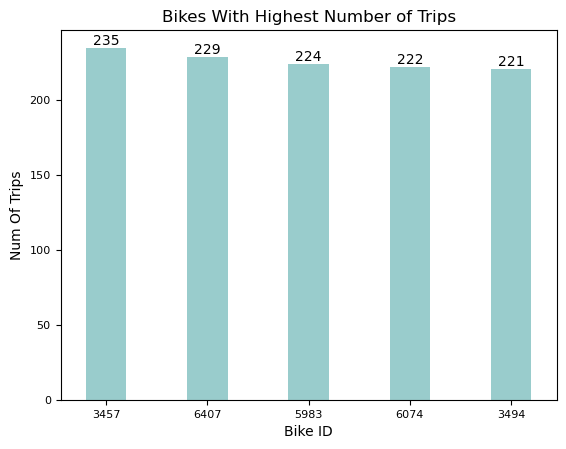

In [40]:
#Plotting Bikes with highest number of trips trips in first quarter of 2019

ax = top_bikes.plot(kind= "bar",
                    title="Bikes With Highest Number of Trips",
                    color = "teal" , alpha = 0.4 , rot = 0,
                ylabel = "Num Of Trips" , xlabel = "Bike ID" 
                ,width =0.4 , fontsize=8)

ax.bar_label(ax.containers[0], fontsize=10 )

plt.show()

### 4. What is the average trip duration in minutes? 

In [41]:
#Calculating average trip duration
avg_tripduration_min = round(divvy_df["tripduration_min"].mean())
avg_tripduration_min

12

In [42]:
#Calculating Customer average trip duration
av_tripduration_min = round(divvy_df["tripduration_min"][
                        divvy_df["usertype"] == "Customer"].mean())
av_tripduration_min

31

In [43]:
#Calculating Subscriber average trip duration
av_tripduration_min = round(divvy_df["tripduration_min"][
                    divvy_df["usertype"] == "Subscriber"].mean())
av_tripduration_min

11

### 5. What are the most popular start stations? 

In [44]:
#Rending most popular start stations
divvy_df["from_station_name"].value_counts().sort_values(
                                    ascending = False).head(5)

Clinton St & Washington Blvd    7699
Clinton St & Madison St         6565
Canal St & Adams St             6342
Columbus Dr & Randolph St       4655
Canal St & Madison St           4571
Name: from_station_name, dtype: int64

### 6. What are the most popular end stations? 

In [45]:
#Rending most popular end stations

divvy_df["to_station_name"].value_counts().sort_values(
                                    ascending = False).head(5)

Clinton St & Washington Blvd    7699
Clinton St & Madison St         6859
Canal St & Adams St             6744
Canal St & Madison St           4875
Michigan Ave & Washington St    4412
Name: to_station_name, dtype: int64

### 7. What are the most popular routes? 

In [46]:
#Rending most popular routes
divvy_df.groupby(["from_station_name" , "to_station_name"])[
         "trip_id"].count().sort_values(ascending = False).head(5)

from_station_name             to_station_name             
Michigan Ave & Washington St  Clinton St & Washington Blvd    513
Columbus Dr & Randolph St     Clinton St & Washington Blvd    491
Michigan Ave & Washington St  Canal St & Adams St             482
Canal St & Madison St         Michigan Ave & Washington St    479
Canal St & Adams St           Michigan Ave & Washington St    447
Name: trip_id, dtype: int64

# 

### 8. What is the percentage of trips by customers and subscribers? 

In [47]:
#calculating Number of Trips done by customers and subscribers  
usertype = divvy_df["usertype"].value_counts()
usertype

Subscriber    341906
Customer       23163
Name: usertype, dtype: int64

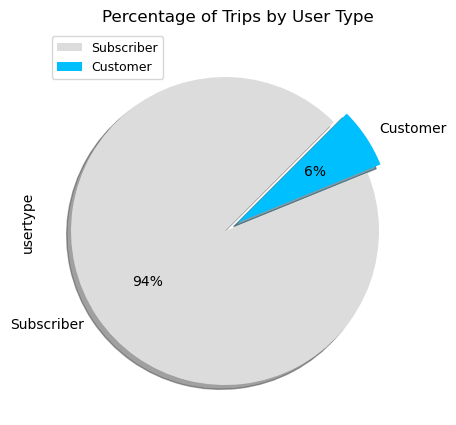

In [48]:
#Plotting the percentage of of trips by subscribers and customers  

usertype.plot(kind = "pie", y='attendees' ,startangle = 45,
           autopct='%1.0f%%' ,explode = [0.1 , 0 ], 
           colors = ['Gainsboro', 'DeepSkyBlue'],shadow = True, 
           figsize = (5 ,5), title='Percentage of Trips by User Type')
plt.legend(loc = "upper left" , fontsize="9")
plt.show()

In [49]:
#Calculating number of trips by female and male users
divvy_df['gender'].value_counts()

Male       278440
Female      66918
Missing     19711
Name: gender, dtype: int64

In [50]:
#Disregarding missing values
user_gender = divvy_df['gender'][
        divvy_df['gender'] != "Missing"].value_counts()
user_gender

Male      278440
Female     66918
Name: gender, dtype: int64

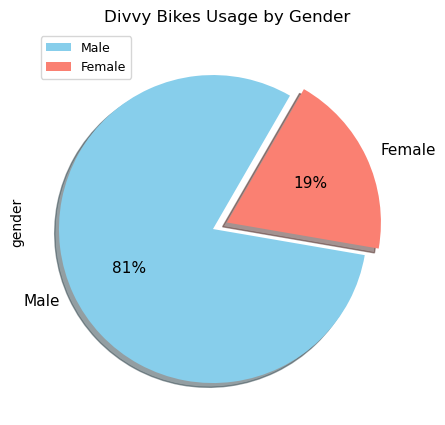

In [51]:
#Plotting the pecentage of trips based on user gender
user_gender.plot(kind = "pie", y='attendees' ,startangle = 60, 
                 autopct='%1.0f%%',explode = [0.1 , 0], 
               colors = ['SkyBlue', 'Salmon'],shadow = True,
                 figsize = (5,5),title='Divvy Bikes Usage by Gender',
                 fontsize=11)
plt.legend(loc = "upper left" , fontsize="9")
plt.show()

### 10. What are the ages of Divvy Bikes users?

In [52]:
#Assigning user_age column to a variable 
user_age = divvy_df['user_age']

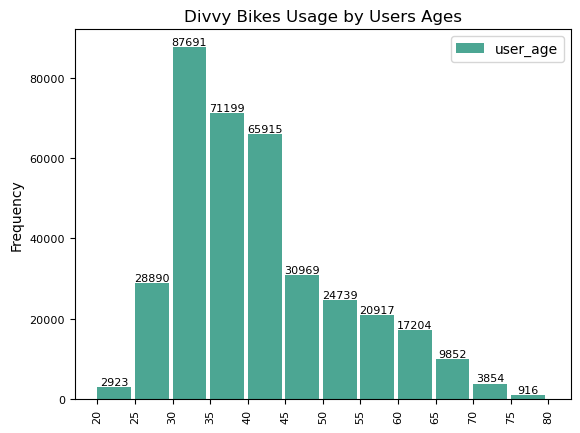

In [53]:
#Plotting Number of Trips by Users ages  

ax = user_age.plot(kind = "hist", rot = 90 , bins =12, width= 4.5 , 
        colormap = "summer",title='Divvy Bikes Usage by Users Ages',
        ylabel = "Num Of Trips" 
        , xlabel = "Users Age", alpha=0.7, legend=True, fontsize=8
         , xticks = range(20,81,5))
ax.bar_label(ax.containers[0] , fontsize=8)

plt.show()

### 11. What time are Divvy bikes most used?

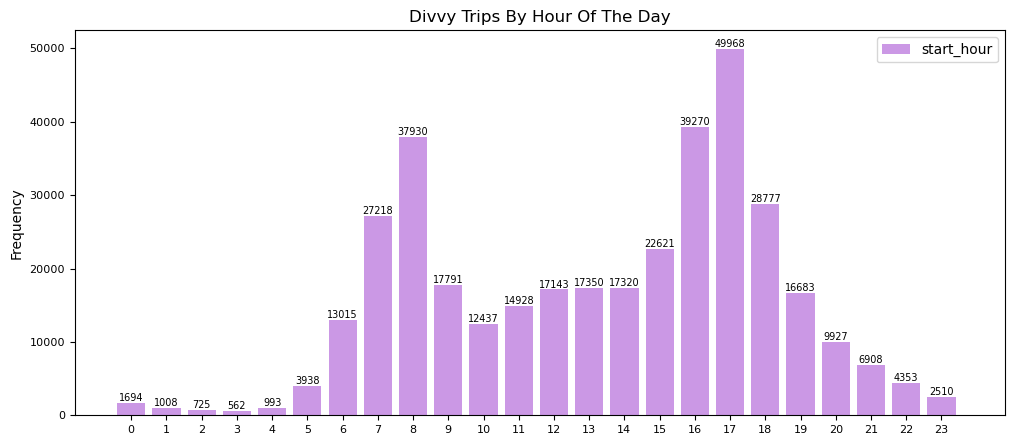

In [54]:
#Plotting number of trips by hour of the day
ax = divvy_df["start_hour"].plot(kind = "hist", 
                    bins = np.arange(25) -0.4,
                    xticks = range(24), width= 0.8,figsize = (12,5),
                    color = "darkorchid", legend=True, fontsize=8 
                    ,xlabel= "Hour Of The Day",
                    ylabel= "Number Of Trips" , alpha=0.5,
                    title= "Divvy Trips By Hour Of The Day")

ax.bar_label(ax.containers[0] , fontsize=7 , color = 'black')
plt.show()




### 12. How is Divvy bikes usage by day?

In [55]:
#Calculting number of trips by weekday 
day_of_week= divvy_df["day_of_week"].value_counts()
day_of_week

Thursday     66903
Friday       63047
Tuesday      61005
Wednesday    60414
Monday       50399
Saturday     35302
Sunday       27999
Name: day_of_week, dtype: int64

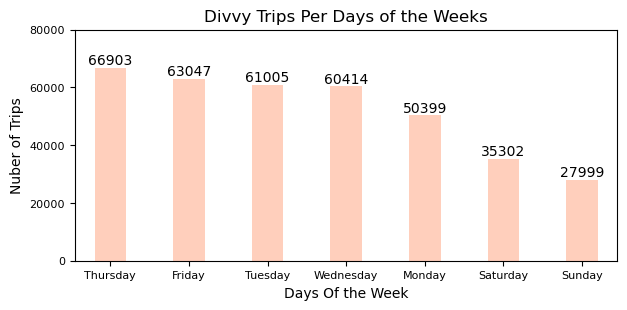

In [56]:
#Plotting number of trips by day of the week
ax = day_of_week.plot(kind= "bar" , 
            title="Divvy Trips Per Days of the Weeks",
            color = ['LightSalmon'] , alpha = 0.5 , rot = 0,
            ylabel = "Nuber of Trips" , xlabel = "Days Of the Week",
            yticks = [0 , 20000, 40000, 60000,80000]
            ,width =0.4 , fontsize=8 , figsize=(7, 3))

ax.bar_label(ax.containers[0], fontsize=10 )
plt.show()